## Initialisation

In [1]:
!pip install geopandas
!pip install pygeodesy
!pip install pygeodesic
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.0/987.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.3/984.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 26.2 M

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import folium
import numpy as np
import pdb
import time

from shapely.geometry import Point
import geopandas as gpd
from geopy.distance import geodesic

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as sma

In [5]:
# Iris Paris
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Iris/Clean/data_iris_paris.geojson'
irisparis = gpd.read_file(file_path)
irisparis.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,shape_Area,geo_point,dep,insee_com,nom_com,iris,code_iris,nom_iris,typ_iris,geometry
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,80920.786958,"{'lon': 2.33473231093, 'lat': 48.8955334043}",75,75118,Paris 18e Arrondissement,6922,751186922,Grandes Carrieres 22,H,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ..."
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,68661.340091,"{'lon': 2.3297484576, 'lat': 48.8945094182}",75,75118,Paris 18e Arrondissement,6923,751186923,Grandes Carrieres 23,H,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ..."
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,73724.514027,"{'lon': 2.3308879204, 'lat': 48.8967235402}",75,75118,Paris 18e Arrondissement,6924,751186924,Grandes Carrieres 24,H,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ..."
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,81608.212989,"{'lon': 2.33742640417, 'lat': 48.8971849905}",75,75118,Paris 18e Arrondissement,6925,751186925,Grandes Carrieres 25,H,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ..."
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,176037.028979,"{'lon': 2.34037476455, 'lat': 48.8999631892}",75,75118,Paris 18e Arrondissement,6926,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ..."


In [6]:
# Immobilier
file_path2 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Immobilier/Clean/Train/75immo_clean_2022.csv'
apartments = pd.read_csv(file_path2)
apartments.head(5)

,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,0,2022-1621603,2022-01-06,1,Vente,605000.0,51.0,NaN,RUE CHARLOT,1880,...,Appartement,42.0,3.0,NaN,NaN,NaN,NaN,NaN,2.362871,48.863374
1,1,2022-1621616,2022-01-07,1,Vente,660000.0,141.0,NaN,RUE DES POISSONNIERS,7564,...,Appartement,81.0,3.0,NaN,NaN,NaN,NaN,NaN,2.352517,48.895742
2,2,2022-1621619,2022-01-07,1,Vente,293000.0,7.0,NaN,RUE SAINT-MARC,8686,...,Appartement,22.0,1.0,NaN,NaN,NaN,NaN,NaN,2.341378,48.870214
3,3,2022-1621625,2022-01-05,1,Vente,300000.0,55.0,NaN,RUE STEPHENSON,9092,...,Appartement,38.0,1.0,NaN,NaN,NaN,NaN,NaN,2.355461,48.889540
4,4,2022-1621629,2022-01-05,1,Vente,335000.0,75.0,NaN,AV NIEL,6773,...,Appartement,33.0,2.0,NaN,NaN,NaN,NaN,NaN,2.295735,48.882706


In [7]:
# Amenité
file_path3 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Amenite/Clean/amenite_geometry.geojson'
amenite = gpd.read_file(file_path3)
amenite.head(5)

,ide,longitude,latitude,geometry
0,terrasses-autorisations_0,2.337336,48.879644,POINT (2.33734 48.87964)
1,terrasses-autorisations_1,2.313040,48.831376,POINT (2.31304 48.83138)
2,terrasses-autorisations_2,2.342332,48.856313,POINT (2.34233 48.85631)
3,terrasses-autorisations_3,2.342860,48.892071,POINT (2.34286 48.89207)
4,terrasses-autorisations_4,2.368621,48.854266,POINT (2.36862 48.85427)


In [8]:
# Immobilier Geometry
file_path4 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Immobilier/Clean/Train/immo_geometry.geojson'
immobilier = gpd.read_file(file_path4)
immobilier.head(5)

,id_mutation,longitude,latitude,geometry
0,2018-743589,2.337476,48.866524,POINT (2.33748 48.86652)
1,2018-743594,2.310473,48.870036,POINT (2.31047 48.87004)
2,2018-743596,2.352721,48.864270,POINT (2.35272 48.86427)
3,2018-743597,2.358997,48.863836,POINT (2.35900 48.86384)
4,2018-743600,2.365106,48.860541,POINT (2.36511 48.86054)


In [9]:
# Iris Revenu
file_path5 = '/content/drive/MyDrive/Colab Notebooks/BigData/Data/Revenu/Clean/75revenu.csv'
revenu = pd.read_csv(file_path5, sep=';')
revenu.head(5)

,Unnamed: 0,IRIS,DEC_PIMP20,DEC_TP6020,DEC_Q120,DEC_MED20,DEC_Q320,DEC_EQ20,DEC_D120,DEC_D220,...,DEC_S80S2020,DEC_GI20,DEC_PACT20,DEC_PTSA20,DEC_PCHO20,DEC_PBEN20,DEC_PPEN20,DEC_PAUT20,DEC_NOTE20,keep
0,9761,751010101,ns,ns,ns,ns,ns,ns,ns,ns,...,ns,ns,ns,ns,ns,ns,ns,ns,so,1
1,9762,751010102,ns,ns,ns,ns,ns,ns,ns,ns,...,ns,ns,ns,ns,ns,ns,ns,ns,so,1
2,9763,751010103,ns,ns,ns,ns,ns,ns,ns,ns,...,ns,ns,ns,ns,ns,ns,ns,ns,so,1
3,9764,751010104,ns,ns,ns,ns,ns,ns,ns,ns,...,ns,ns,ns,ns,ns,ns,ns,ns,so,1
4,9765,751010105,nd,nd,nd,nd,nd,nd,nd,nd,...,nd,nd,nd,nd,nd,nd,nd,nd,so,1


## EDA

In [11]:
# irisparis.columns
columns_list = irisparis.columns.tolist()
columns_list

['OBJECTID',
 'n_sq_ir',
 'c_cainsee',
 'n_qu',
 'c_ir',
 'c_typeir',
 'l_ir',
 'm2_ip',
 'm2_pop',
 'm2_emp',
 'nb_pop',
 'nb_pop_n5',
 'nb_pop_1999',
 'nb_evo_pop',
 'nb_evo_pop_n5',
 'pct_evo_pop',
 'pct_evo_pop_n5',
 'nb_surface',
 'nb_densite',
 'nb_p_age_0',
 'nb_p_age_5',
 'nb_p_age_10',
 'nb_p_age_15',
 'nb_p_age_20',
 'nb_p_age_25',
 'nb_p_age_30',
 'nb_p_age_35',
 'nb_p_age_40',
 'nb_p_age_45',
 'nb_p_age_50',
 'nb_p_age_55',
 'nb_p_age_60',
 'nb_p_age_65',
 'nb_p_age_70',
 'nb_p_age_75',
 'nb_p_age_80',
 'nb_p_age_85',
 'nb_p_age_90p',
 'nb_age_019',
 'nb_age_60p',
 'nb_age_65p',
 'nb_age_75p',
 'pct_age_019',
 'pct_age_60p',
 'pct_age_65p',
 'pct_age_75p',
 'nb_age_019_n5',
 'nb_age_60p_n5',
 'nb_age_65p_n5',
 'nb_age_75p_n5',
 'pct_age_019_n5',
 'pct_age_60p_n5',
 'pct_age_65p_n5',
 'pct_age_75p_n5',
 'pct_evo_age_019',
 'pct_evo_age_60p',
 'pct_evo_age_65p',
 'pct_evo_age_75p',
 'nb_etranger',
 'pct_etranger',
 'nb_etranger_n5',
 'pct_etranger_n5',
 'pct_evo_etranger',
 '

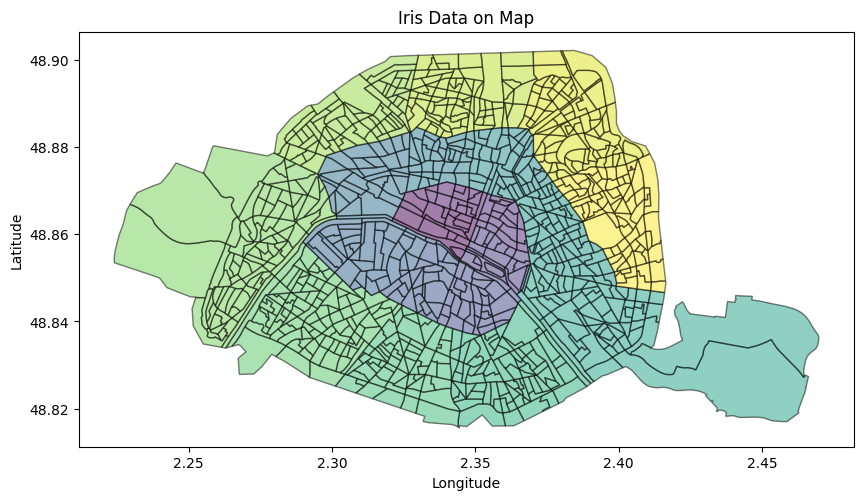

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
irisparis.plot(ax=ax, alpha=0.5, edgecolor='k', column='c_ir', legend=False)
# 'c_iris' --> Numéro IRIS

# Details
plt.title('Iris Data on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [13]:
columns_list2 = apartments.columns.tolist()
columns_list2

['Unnamed: 0',
 'id_mutation',
 'date_mutation',
 'numero_disposition',
 'nature_mutation',
 'valeur_fonciere',
 'adresse_numero',
 'adresse_suffixe',
 'adresse_nom_voie',
 'adresse_code_voie',
 'code_postal',
 'code_commune',
 'nom_commune',
 'code_departement',
 'ancien_code_commune',
 'ancien_nom_commune',
 'id_parcelle',
 'ancien_id_parcelle',
 'numero_volume',
 'lot1_numero',
 'lot1_surface_carrez',
 'lot2_numero',
 'lot2_surface_carrez',
 'lot3_numero',
 'lot3_surface_carrez',
 'lot4_numero',
 'lot4_surface_carrez',
 'lot5_numero',
 'lot5_surface_carrez',
 'nombre_lots',
 'code_type_local',
 'type_local',
 'surface_reelle_bati',
 'nombre_pieces_principales',
 'code_nature_culture',
 'nature_culture',
 'code_nature_culture_speciale',
 'nature_culture_speciale',
 'surface_terrain',
 'longitude',
 'latitude']

In [ ]:
# folium map
paris_center = [48.8566, 2.3522]

m = folium.Map(location=paris_center, zoom_start=13)

for idx, row in apartments.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# Display the map
m

In [14]:
# to delete ?


# Adding the closest IRIS from the 'irisparis' dataframe to 'apartments' data frame
apartments['geometry'] = apartments.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Dataframe to GeoDataframe
apartments_gdf = gpd.GeoDataFrame(apartments, geometry='geometry')

apartments_gdf['closest_ir'] = None

In [ ]:
# takes too long to execute

for apt_index, apartment in apartments_gdf.iterrows():
    print(f"Checking Apartment {apt_index + 1}: {apartment['geometry']}")
    for ir_index, iris in df.iterrows():
        print(f"\tChecking Iris {iris['c_ir']}: {iris['geometry']}")
        if iris['geometry'].contains(apartment['geometry']):
            print(f"\tApartment {apt_index + 1} is within Iris {iris['c_ir']}")
            apartments_gdf.at[apt_index, 'closest_ir'] = iris['c_ir']
            break
        else:
            print(f"\tApartment {apt_index + 1} is NOT within Iris {iris['c_ir']}")

print(apartments_gdf)

In [16]:
apartments['geometry'] = [Point(xy) for xy in zip(apartments['longitude'], apartments['latitude'])]
apartments['closest_ir'] = None

In [ ]:
# to delete ???
iris_geometries = irisparis['geometry'].tolist()
iris_geometries

In [18]:
# Loop to find the closest IRIS to each apartment
for index, apt_point in apartments['geometry'].iteritems():
    print(index)
    matches = apt_point.within(iris_geometries)
    match_index = np.where(matches)[0][0]

    apartments.at[index, 'closest_ir'] = irisparis.at[match_index, 'c_ir']

<ipython-input-18-e2d39adfa9d0>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, apt_point in apartments['geometry'].iteritems():


Streaming output truncated to the last 5000 lines.
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379
8380
8381
8382
8383
8384
8385
8386
8387
8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400
8401

In [19]:
apartments['prix_per_m2'] = apartments['valeur_fonciere'] / apartments['surface_reelle_bati']
apartments.head(5)

,Unnamed: 0,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,...,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,geometry,closest_ir,prix_per_m2
0,0,2022-1621603,2022-01-06,1,Vente,605000.0,51.0,NaN,RUE CHARLOT,1880,...,NaN,NaN,NaN,NaN,NaN,2.362871,48.863374,POINT (2.362871 48.863374),751031004,14404.761905
1,1,2022-1621616,2022-01-07,1,Vente,660000.0,141.0,NaN,RUE DES POISSONNIERS,7564,...,NaN,NaN,NaN,NaN,NaN,2.352517,48.895742,POINT (2.352517 48.895742),751187026,8148.148148
2,2,2022-1621619,2022-01-07,1,Vente,293000.0,7.0,NaN,RUE SAINT-MARC,8686,...,NaN,NaN,NaN,NaN,NaN,2.341378,48.870214,POINT (2.341378 48.870214),751020602,13318.181818
3,3,2022-1621625,2022-01-05,1,Vente,300000.0,55.0,NaN,RUE STEPHENSON,9092,...,NaN,NaN,NaN,NaN,NaN,2.355461,48.889540,POINT (2.355461 48.88954),751187108,7894.736842
4,4,2022-1621629,2022-01-05,1,Vente,335000.0,75.0,NaN,AV NIEL,6773,...,NaN,NaN,NaN,NaN,NaN,2.295735,48.882706,POINT (2.295735 48.882706),751176512,10151.515152


In [20]:
# median price per m2 based on the IRIS
grouped_prices = apartments.groupby('closest_ir')['prix_per_m2'].median()
print(grouped_prices)

closest_ir
751010101    15185.454545
751010102    22444.444444
751010201    11625.000000
751010202    12207.482843
751010203    11485.593220
                 ...     
751208022     9963.116279
751208023     8786.111111
751208024     8533.333333
751208025     9227.777778
751208026     9345.714286
Name: prix_per_m2, Length: 860, dtype: float64


In [21]:
# adding the median price to the 'irisparis'

merged_df = irisparis.merge(grouped_prices, how='left', left_on='c_ir', right_index=True)
merged_df

,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,...,geo_point,dep,insee_com,nom_com,iris,code_iris,nom_iris,typ_iris,geometry,prix_per_m2
0,20,750004033,75118,69,751186922,H,Grandes Carrières 22,69711.047044,42891.780556,69688.085258,...,"{'lon': 2.33473231093, 'lat': 48.8955334043}",75,75118,Paris 18e Arrondissement,6922,751186922,Grandes Carrieres 22,H,"POLYGON ((2.33756 48.89531, 2.33799 48.89591, ...",5506.608466
1,21,750004043,75118,69,751186923,H,Grandes Carrières 23,51939.257797,51939.489210,51939.257797,...,"{'lon': 2.3297484576, 'lat': 48.8945094182}",75,75118,Paris 18e Arrondissement,6923,751186923,Grandes Carrieres 23,H,"POLYGON ((2.33262 48.89419, 2.33251 48.89430, ...",10030.000000
2,22,750004027,75118,69,751186924,H,Grandes Carrières 24,49511.462977,43233.728108,47498.682647,...,"{'lon': 2.3308879204, 'lat': 48.8967235402}",75,75118,Paris 18e Arrondissement,6924,751186924,Grandes Carrieres 24,H,"POLYGON ((2.33297 48.89606, 2.33308 48.89627, ...",8586.935705
3,23,750004026,75118,69,751186925,H,Grandes Carrières 25,53456.911856,37176.576688,44169.508934,...,"{'lon': 2.33742640417, 'lat': 48.8971849905}",75,75118,Paris 18e Arrondissement,6925,751186925,Grandes Carrieres 25,H,"POLYGON ((2.34229 48.89722, 2.34236 48.89733, ...",11230.769231
4,24,750004862,75118,69,751186926,H,Grandes Carrières 26,100866.919597,38308.332796,83837.826331,...,"{'lon': 2.34037476455, 'lat': 48.8999631892}",75,75118,Paris 18e Arrondissement,6926,751186926,Grandes Carrieres 26,H,"POLYGON ((2.34416 48.89795, 2.34411 48.89931, ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,1802,750004038,75119,74,751197405,H,Pont de Flandre 5,54952.126842,36597.775090,54948.112129,...,"{'lon': 2.38255324768, 'lat': 48.8935496677}",75,75119,Paris 19e Arrondissement,7405,751197405,Pont de Flandre 5,H,"POLYGON ((2.38437 48.89453, 2.38370 48.89564, ...",8217.391304
988,2374,750004900,75113,51,751135108,H,Maison Blanche 8,315397.370792,51190.436659,153176.418033,...,"{'lon': 2.35194386627, 'lat': 48.8181523099}",75,75113,Paris 13e Arrondissement,5108,751135108,Maison Blanche 8,H,"POLYGON ((2.35954 48.81888, 2.35952 48.81901, ...",NaN
989,2375,750004899,75114,54,751145401,H,Parc de Montsouris 1,361226.973089,51415.733963,101504.657933,...,"{'lon': 2.33690149288, 'lat': 48.8187788068}",75,75114,Paris 14e Arrondissement,5401,751145401,Parc de Montsouris 1,H,"POLYGON ((2.34398 48.81580, 2.34407 48.81742, ...",NaN
990,2376,750004885,75115,60,751156001,H,Javel 1,676886.306546,60880.484464,486409.632454,...,"{'lon': 2.27310907436, 'lat': 48.8331960558}",75,75115,Paris 15e Arrondissement,6001,751156001,Javel 1,H,"POLYGON ((2.27825 48.83608, 2.27695 48.83638, ...",NaN


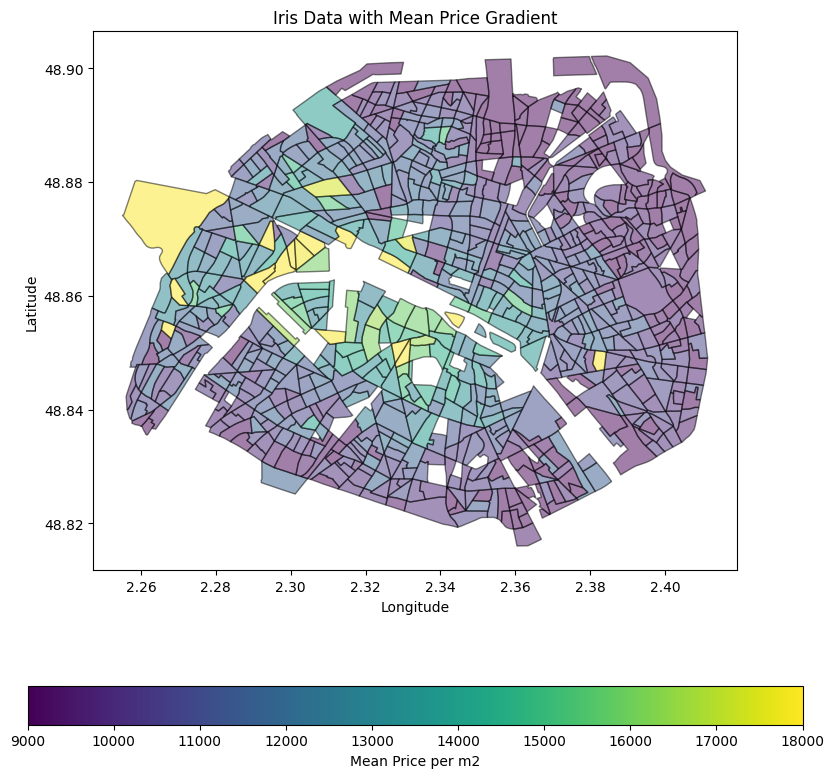

In [ ]:
cmap = 'viridis'
norm = colors.Normalize(vmin=9000, vmax=18000)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot
merged_df.plot(ax=ax, alpha=0.5, edgecolor='k', column='prix_per_m2', cmap=cmap,
               legend=True, legend_kwds={'label': "Mean Price per m2", 'orientation': "horizontal"},
               norm=norm)


# Details
plt.title('Iris Data with Mean Price Gradient')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
most_expensive = merged_df.loc[merged_df['prix_per_m2'].idxmax()]
cheapest = merged_df.loc[merged_df['prix_per_m2'].idxmin()]

print("Most Expensive Iris Area:")
print(most_expensive)

print("\nCheapest Iris Area:")
print(cheapest)


Most Expensive Iris Area:
OBJECTID                                                     617
n_sq_ir                                                750004466
c_cainsee                                                  75116
n_qu                                                          62
c_ir                                                   751166223
                                     ...                        
code_iris                                              751166223
nom_iris                                               Muette 23
typ_iris                                                       A
geometry       POLYGON ((2.272618309545214 48.85829047959909,...
prix_per_m2                                        161095.637584
Name: 455, Length: 82, dtype: object

Cheapest Iris Area:
OBJECTID                                                     169
n_sq_ir                                                750004203
c_cainsee                                                  75108
n_qu  

## Intersection Matrix

In [ ]:
rows = len(immobilier)
cols = len(amenite)
intersection_matrix = np.zeros((rows, cols),dtype='int8')

intersection_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [ ]:

first_imm_row = immobilier.iloc[0]

def convert(var):
    res = int(var/100)
    if res<=127:
      return res
    else:
      return 127

start_time1 = time.time()
for j, amen_row in amenite.iterrows():
    coords_imm = (first_imm_row['latitude'], first_imm_row['longitude'])
    coords_amen = (amen_row['latitude'], amen_row['longitude'])

    distance = geodesic(coords_imm, coords_amen).meters

    intersection_matrix[0, j] = convert(distance)

end_time1 = time.time()
execution_time = end_time1 - start_time1
print(execution_time)

11.784912824630737


In [ ]:
intersection_matrix

array([[14, 43, 11, ..., 44, 34, 11],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int8)

In [ ]:
# why ???

immobilier_2d = immobilier.to_crs(epsg=2154)
amenite_2d = amenite.to_crs(epsg=2154)

In [ ]:
first_apartment = immobilier_2d.iloc[0]['geometry']

x1, y1 = first_apartment.xy

num_amenities = len(amenite_2d)
distances_matrix = np.zeros((len(immobilier_2d), num_amenities),dtype='int8')

start_time2 = time.time()

for j, amen_row in amenite_2d.iterrows():
    amen_geometry = amen_row['geometry']
    x2, y2 = amen_geometry.xy
    distance = np.sqrt((x1[0] - x2[0])**2 + (y1[0] - y2[0])**2)
    distances_matrix[0, j] = convert(distance)

end_time2 = time.time()
execution_time2 = end_time2 - start_time2
print(execution_time2)

4.56743597984314


In [ ]:
distances_matrix

array([[14, 42, 11, ..., 44, 34, 11],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int8)

In [ ]:
start_time3 = time.time()


first_apartment = immobilier_2d.iloc[0]['geometry']

Result=amenite_2d['geometry'].distance(first_apartment,align=True)


end_time3 = time.time()
execution_time3 = end_time3 - start_time3
print(execution_time3)


0.02181077003479004


In [ ]:
Result

#why *100 ???

0        1458.965779
1        4299.990357
2        1190.018520
3        2868.021360
4        2660.738787
            ...     
35735    4311.418104
35736    3840.599860
35737    4485.993341
35738    3477.130020
35739    1161.799280
Length: 35740, dtype: float64

In [ ]:
first_apartment = immobilier_2d.iloc[0]['geometry']

# Extract coordinates for immobilier_2d and amenite_2d
immobilier_coords = np.array([list(point.xy) for point in immobilier_2d['geometry']])
amenite_coords = np.array([list(point.xy) for point in amenite_2d['geometry']])

start_time2 = time.time()

# Compute distances between coordinates using broadcasting
immobilier_coords_broadcast = immobilier_coords[:1]
distances_matrix = np.sqrt(np.sum((immobilier_coords_broadcast[:, None, :] - amenite_coords) ** 2, axis=2))

# Perform the necessary conversion
def convert(distance):
    res = int(distance / 100)
    if res <= 127:
        return res
    else:
        return 127

# Apply the conversion element-wise to the distance matrix
convert_vec = np.vectorize(convert)
distances_matrix_converted = convert_vec(distances_matrix)

end_time2 = time.time()
execution_time2 = end_time2 - start_time2
print(execution_time2)


0.012418746948242188


In [ ]:
distances_matrix_converted

array([[[14],
        [42],
        [11],
        ...,
        [44],
        [34],
        [11]]])

## Modeling

In [ ]:
merged_data = pd.merge(apartments, revenu, how='left', left_on='closest_ir', right_on='IRIS')
merged_data.head()

,Unnamed: 0_x,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,...,DEC_S80S2020,DEC_GI20,DEC_PACT20,DEC_PTSA20,DEC_PCHO20,DEC_PBEN20,DEC_PPEN20,DEC_PAUT20,DEC_NOTE20,keep
0,0,2022-1621603,2022-01-06,1,Vente,605000.0,51.0,NaN,RUE CHARLOT,1880,...,"24,4","0,579","74,6","57,7","2,4","14,5","9,5","15,9",0,1
1,1,2022-1621616,2022-01-07,1,Vente,660000.0,141.0,NaN,RUE DES POISSONNIERS,7564,...,"14,3","0,432","83,8","71,8","5,7","6,3","12,9","3,3",0,1
2,2,2022-1621619,2022-01-07,1,Vente,293000.0,7.0,NaN,RUE SAINT-MARC,8686,...,"16,2","0,496","75,5","65,0","2,6","7,9","9,8","14,7",0,1
3,3,2022-1621625,2022-01-05,1,Vente,300000.0,55.0,NaN,RUE STEPHENSON,9092,...,"17,6","0,460","83,1","70,7","5,3","7,1","13,5","3,4",0,1
4,4,2022-1621629,2022-01-05,1,Vente,335000.0,75.0,NaN,AV NIEL,6773,...,"14,8","0,481","73,5","59,6","2,4","11,5","13,6","12,9",0,1


In [ ]:
dfcorr = merged_data.copy()

In [ ]:
# Specify the columns to drop
columns_to_drop = ['Unnamed: 0_x', 'id_mutation', 'date_mutation']

# Drop the specified columns
dfcorr.drop(columns=columns_to_drop, inplace=True)

In [ ]:
dfcorr.columns

Index(['numero_disposition', 'nature_mutation', 'valeur_fonciere',
       'adresse_numero', 'adresse_suffixe', 'adresse_nom_voie',
       'adresse_code_voie', 'code_postal', 'code_commune', 'nom_commune',
       'code_departement', 'ancien_code_commune', 'ancien_nom_commune',
       'id_parcelle', 'ancien_id_parcelle', 'numero_volume', 'lot1_numero',
       'lot1_surface_carrez', 'lot2_numero', 'lot2_surface_carrez',
       'lot3_numero', 'lot3_surface_carrez', 'lot4_numero',
       'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez',
       'nombre_lots', 'code_type_local', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'code_nature_culture', 'nature_culture',
       'code_nature_culture_speciale', 'nature_culture_speciale',
       'surface_terrain', 'longitude', 'latitude', 'geometry', 'closest_ir',
       'Unnamed: 0_y', 'IRIS', 'DEC_PIMP20', 'DEC_TP6020', 'DEC_Q120',
       'DEC_MED20', 'DEC_Q320', 'DEC_EQ20', 'DEC_D120', 'DEC_D220', 'DEC_D320',
  

In [ ]:
dfcorr = dfcorr[merged_data['DEC_MED20'] != 'ns']


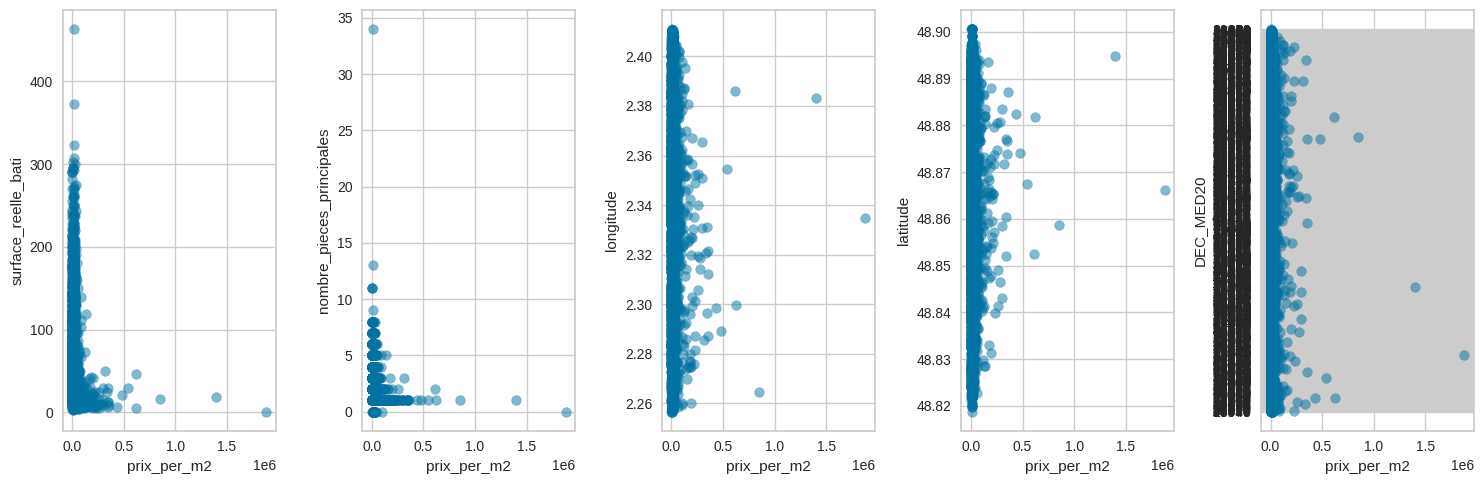

In [ ]:
# Specify the columns to include in the correlation analysis
columns_to_include = ['surface_reelle_bati', 'nombre_pieces_principales',
                      'longitude', 'latitude', 'DEC_MED20']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_include), figsize=(15, 5))

# Iterate over each column and create a plot
for i, col in enumerate(columns_to_include):
    # Plot scatter plot
    axes[i].scatter(dfcorr['prix_per_m2'], dfcorr[col], alpha=0.5)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('prix_per_m2')

plt.tight_layout()
plt.show()


Price Range: 6451.920122887865 - 16258.200000000003
Number of data points in dfcorr: 13002
Number of data points in df_filtered: 10395


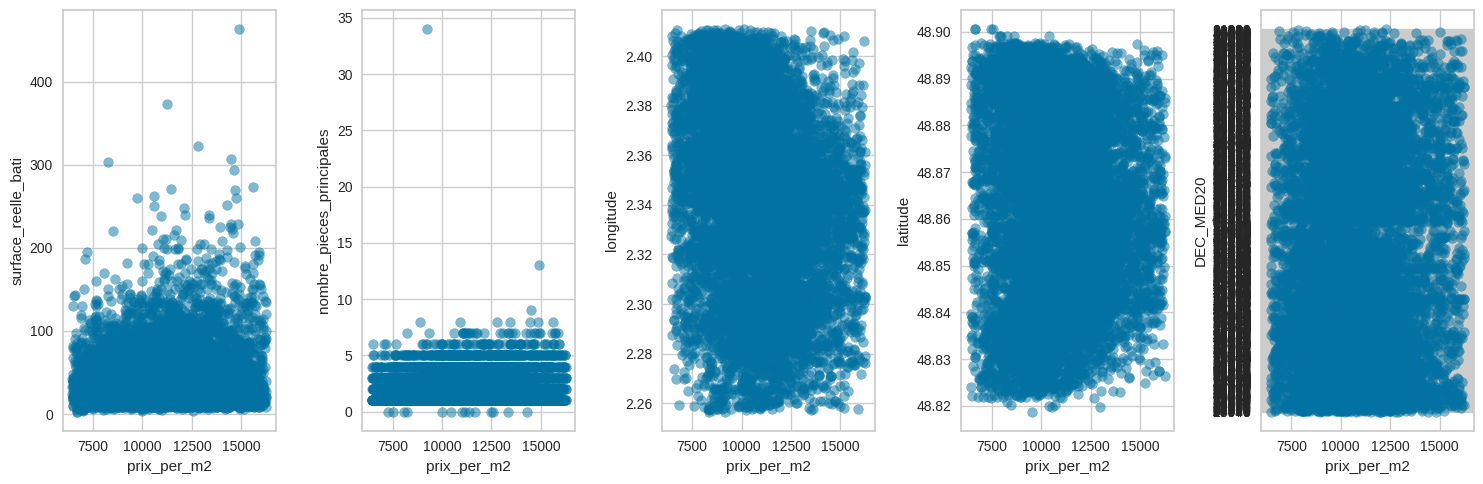

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Remove rows with NaN values in 'prix_per_m2' column
df_filtered = dfcorr.dropna(subset=['prix_per_m2'])

# Specify the percentile range to consider (e.g., from 10th to 90th percentile)
percentile_range = [10, 90]

# Calculate the price range based on the specified percentile
price_min = np.percentile(df_filtered['prix_per_m2'], percentile_range[0])
price_max = np.percentile(df_filtered['prix_per_m2'], percentile_range[1])

print("Price Range:", price_min, "-", price_max)

# Filter the dataframe to include only prices within the specified percentile range
df_filtered = df_filtered[(df_filtered['prix_per_m2'] >= price_min) & (df_filtered['prix_per_m2'] <= price_max)]

print("Number of data points in dfcorr:", len(dfcorr))
print("Number of data points in df_filtered:", len(df_filtered))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_include), figsize=(15, 5))

# Iterate over each column and create a plot
for i, col in enumerate(columns_to_include):
    # Plot scatter plot using filtered data
    axes[i].scatter(df_filtered['prix_per_m2'], df_filtered[col], alpha=0.5)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('prix_per_m2')

plt.tight_layout()
plt.show()


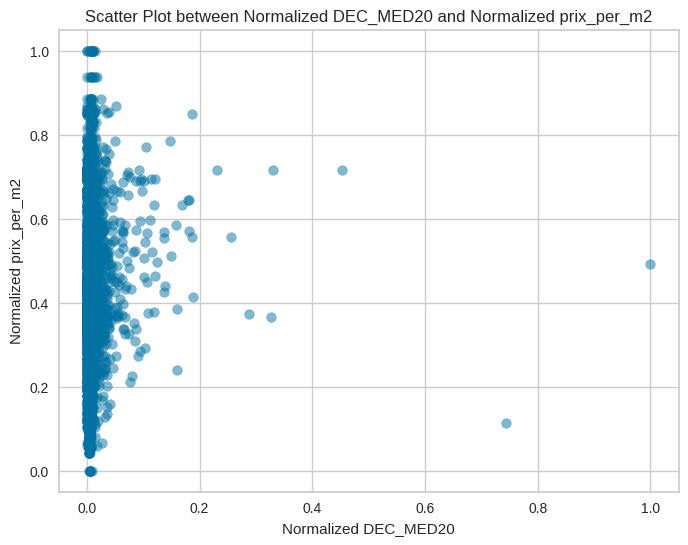

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Normalize the columns
scaler = MinMaxScaler()
df_normalized = dfcorr.copy()
df_normalized[['DEC_MED20', 'prix_per_m2']] = scaler.fit_transform(df_normalized[['DEC_MED20', 'prix_per_m2']])

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_normalized['prix_per_m2'], df_normalized['DEC_MED20'], alpha=0.5)
plt.xlabel('Normalized DEC_MED20')
plt.ylabel('Normalized prix_per_m2')
plt.title('Scatter Plot between Normalized DEC_MED20 and Normalized prix_per_m2')
plt.grid(True)
plt.show()


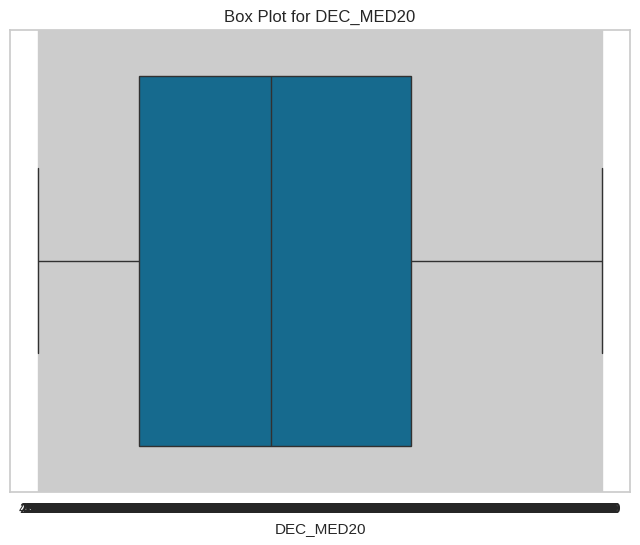

In [ ]:
import seaborn as sns

# Create a box plot for DEC_MED20 using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=dfcorr['DEC_MED20'], orient='h')
plt.xlabel('DEC_MED20')
plt.title('Box Plot for DEC_MED20')
plt.show()


In [ ]:
# Calculate statistics for DEC_MED20
min_value = dfcorr['DEC_MED20'].min()
max_value = dfcorr['DEC_MED20'].max()
median_value = dfcorr['DEC_MED20'].median()

print("Minimum value:", min_value)
print("Maximum value:", max_value)
print("Median value:", median_value)


Minimum value: 12370
Maximum value: 9730
Median value: 34920.0


In [ ]:
# Specify the columns to include in the correlation analysis
columns_to_include = merged_data.columns.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_include), figsize=(15, 5))

# Iterate over each column and create a plot
for i, col in enumerate(columns_to_include):
    # Plot scatter plot
    axes[i].scatter(merged_data['prix_per_m2'], merged_data[col], alpha=0.5)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('prix_per_m2')

plt.tight_layout()
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

Error in callback <function _draw_all_if_interactive at 0x78eb56514f70> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x78eb565141f0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
merged_data.shape

(13212, 71)

In [ ]:
#DEC_MED20
#prix_per_m2
#surface_reelle_bati
#nombre_pieces_principales

In [ ]:
merged_data = merged_data[merged_data['DEC_MED20'] != 'ns']
merged_data.shape

(13002, 71)

In [ ]:
# why ???
merged_data.dropna(subset=['prix_per_m2'], inplace=True)

In [ ]:
df = merged_data[['prix_per_m2','DEC_MED20','surface_reelle_bati']]

df['DEC_MED20'] = df['DEC_MED20'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12995 entries, 0 to 13211
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   prix_per_m2          12995 non-null  float64
 1   DEC_MED20            12995 non-null  float64
 2   surface_reelle_bati  12995 non-null  float64
dtypes: float64(3)
memory usage: 922.1 KB


In [ ]:
df.head(10)

,prix_per_m2,DEC_MED20,surface_reelle_bati
0,14404.761905,40940.0,42.0
1,8148.148148,23070.0,81.0
2,13318.181818,39470.0,22.0
3,7894.736842,17620.0,38.0
4,10151.515152,43960.0,33.0
5,10357.142857,42070.0,70.0
6,10714.285714,25710.0,14.0
7,7258.064516,38480.0,31.0
8,5833.333333,38480.0,54.0
9,1000.000000,30280.0,15.0


In [ ]:
# Import necessary libraries
from pycaret.regression import *

# Initialize PyCaret setup
exp_reg = setup(data=merged_data, target='prix_per_m2', session_id=123,
                numeric_features=['surface_reelle_bati', 'nombre_pieces_principales', 'DEC_MED20'])

# Compare all regression models
best_model = compare_models(fold=5)

# Print the best model
print(best_model)


,Description,Value
0,Session id,123
1,Target,prix_per_m2
2,Target type,Regression
3,Original data shape,"(12995, 71)"
4,Transformed data shape,"(12995, 93)"
5,Transformed train set shape,"(9096, 93)"
6,Transformed test set shape,"(3899, 93)"
7,Ordinal features,1
8,Numeric features,3
9,Categorical features,36


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,6684.3496,1080432012.8000,30239.7785,0.0759,1.2823,2070.0388,4.6780
dummy,Dummy Regressor,6733.1699,1111078201.6000,31076.3031,-0.0009,1.2849,2079.3661,4.3660
lightgbm,Light Gradient Boosting Machine,6923.8327,1125331437.3278,31370.3470,-0.0265,1.2923,2089.5172,5.3220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)


In [ ]:
selected_columns = ['surface_reelle_bati','DEC_MED20' ]

In [ ]:
merged_data2 = merged_data.dropna()
y = merged_data2['prix_per_m2']
x = merged_data2[selected_columns]
logit_model = sma.ols(formula = 'prix_per_m2 ~ DEC_MED20 + surface_reelle_bati' , data=df)
result = logit_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            prix_per_m2   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     88.90
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           4.51e-39
Time:                        10:25:11   Log-Likelihood:            -1.5203e+05
No. Observations:               12995   AIC:                         3.041e+05
Df Residuals:                   12992   BIC:                         3.041e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5224.7407    

* DEC_MED20: The coefficient for the variable "DEC_MED20," which seems to be related to median household income. It's 0.3183, indicating that for a one-unit increase in DEC_MED20, the "prix_per_m2" is expected to increase by 0.3183 units, holding other variables constant.
* surface_reelle_bati: The coefficient for the variable "surface_reelle_bati," which appears to be the size of the property. It's -74.0161, indicating that for a one-unit increase in the size of the property, the "prix_per_m2" is expected to decrease by 74.0161 units, holding other variables constant.

In [ ]:
selected_columns = ['DEC_MED20', 'surface_reelle_bati', 'nombre_pieces_principales']
data = merged_data[selected_columns]

target = merged_data['prix_per_m2']

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

In [ ]:
normalized_data

array([[ 0.55736709, -0.05960634,  0.72387463],
       [-1.32749209,  1.04262266,  0.72387463],
       [ 0.40231712, -0.62485198, -0.884942  ],
       ...,
       [-0.68408744, -0.87921252, -0.884942  ],
       [ 1.2735503 ,  1.2969832 ,  0.72387463],
       [-1.43296826, -0.427016  , -0.884942  ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.2, random_state=2024)

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

predictions = ols_model.predict(X_test)


r2 = r2_score(y_test, predictions)
r2

0.01546748440583201

In [ ]:
train_predictions = ols_model.predict(X_train)


mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)


In [ ]:
r2

0.01546748440583201

In [ ]:
merged_data = merged_data[merged_data['DEC_MED20'] != 'ns']
merged_data.dropna(subset=['prix_per_m2'], inplace=True)

data = merged_data[selected_columns]
target = merged_data['prix_per_m2']

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)
scaler_target = StandardScaler()
normalized_target = scaler_target.fit_transform(target.values.reshape(-1, 1))  # Reshape to ensure correct format for StandardScaler

X_train, X_test, y_train, y_test = train_test_split(normalized_data, normalized_target, test_size=0.2, random_state=2024)

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

#test set
predictions = ols_model.predict(X_test)

#Inverse transform
predictions_actual = scaler_target.inverse_transform(predictions)



In [ ]:
r2 = r2_score(y_test, predictions)
r2

0.015467484405832344

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

ols_model = sm.OLS(y_train, X_train)
ols_results = ols_model.fit()

predictions = ols_results.predict(X_test)


# Summary of the regression model
print(ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:            prix_per_m2   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     47.59
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.54e-30
Time:                        09:49:57   Log-Likelihood:            -1.2223e+05
No. Observations:               10396   AIC:                         2.445e+05
Df Residuals:                   10392   BIC:                         2.445e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.334e+04    303.157     44.007      0.0

In [ ]:
selected_columns = ['DEC_MED20', 'surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude']
data = merged_data[selected_columns]

target = merged_data['prix_per_m2']

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.2, random_state=2024)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting
ols_model = sm.OLS(y_train, X_train)
ols_results = ols_model.fit()

# Predicting
predictions = ols_results.predict(X_test)

# r2
r2 = r2_score(y_test, predictions)
print(f"R-squared (R2): {r2:.4f}")

print(ols_results.summary())


R-squared (R2): 0.0147
                            OLS Regression Results                            
Dep. Variable:            prix_per_m2   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     29.00
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           2.48e-29
Time:                        10:30:17   Log-Likelihood:            -1.2223e+05
No. Observations:               10396   AIC:                         2.445e+05
Df Residuals:                   10390   BIC:                         2.445e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.334e+04    303.

In [ ]:
geometry = [Point(xy) for xy in zip(merged_data['longitude'], merged_data['latitude'])]
gdf = gpd.GeoDataFrame(merged_data, geometry=geometry, crs=CRS("EPSG:4326"))


# Convert to a new CRS (EPSG 2154)
gdf_crs = gdf.to_crs(epsg=2154)


merged_data['new_longitude'] = gdf_crs.geometry.x
merged_data['new_latitude'] = gdf_crs.geometry.y

selected_columns = ['DEC_MED20', 'surface_reelle_bati', 'nombre_pieces_principales', 'new_longitude', 'new_latitude']
data = merged_data[selected_columns]

target = merged_data['prix_per_m2']

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.2, random_state=2024)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting
ols_model = sm.OLS(y_train, X_train)
ols_results = ols_model.fit()

# Predicting
predictions = ols_results.predict(X_test)


print(ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:            prix_per_m2   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     29.00
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.48e-29
Time:                        10:45:09   Log-Likelihood:            -1.2223e+05
No. Observations:               10396   AIC:                         2.445e+05
Df Residuals:                   10390   BIC:                         2.445e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.334e+04    303.156     44.010      0.0